# Analysing

Rank anaylsis

In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt 
 

In [2]:
GENS = 200 #hay una generación más, la que contiene el PF
population = 10
# population = 100


In [3]:
# df = pd.read_csv("../examples/fpp/test_200g_100p.csv")
df = pd.read_csv("../examples/fpp/test_10p.csv")
# df = pd.read_csv("../examples/fpp/test_500g.csv")

df.head()

def clean_parents(item):
    item = list(eval(item))
    return pd.Series([item[0], item[1]])

df[["parent1","parent2"]]=df["parent"].apply(clean_parents)

In [4]:
df.drop(df[df.iter==GENS].index,inplace=True) #these samples are in the GENS+1 

In [5]:
df.loc[df.iter==GENS+1,"iter"]=GENS #we change the GENS+1 to GEN 

In [6]:
df[df.pf==False]

,iter,idx,n_gen,n_iter,rank,crowding,parent,mutate,mutate_rate,pf,parent1,parent2


In [7]:
print(df.shape)

(3000, 12)


In [8]:
# df.loc[df.pf=="nan","pf"]=False
df.pf.fillna(False,inplace=True)
df.loc[df.pf=="true","pf"]=True
df.loc[df.pf=="false","pf"]=False

In [9]:
df["mutate_rate"].fillna("-",inplace=True)

In [10]:
print((df.pf==True).all())
df.head()

False


,iter,idx,n_gen,n_iter,rank,crowding,parent,mutate,mutate_rate,pf,parent1,parent2
0,1,1_2,1,1,0,inf,"['0', '0']",NaN,-,False,0,0
1,1,1_5,1,1,0,1.000000,"['0', '0']",NaN,-,False,0,0
2,1,1_9,1,1,0,inf,"['0', '0']",NaN,-,False,0,0
3,1,1_0,1,1,1,inf,"['0', '0']",NaN,-,False,0,0
4,1,1_1,1,1,1,0.523935,"['0', '0']",NaN,-,False,0,0


In [11]:
df.tail()

,iter,idx,n_gen,n_iter,rank,crowding,parent,mutate,mutate_rate,pf,parent1,parent2
3005,301,292_2,292,292,0,0.238389,"['280_6', '289_0']",NaN,-,True,280_6,289_0
3006,301,298_3,298,298,0,0.196245,"['297_5', '297_4']",NaN,-,True,297_5,297_4
3007,301,296_5,296,296,0,0.187253,"['292_2', '295_3']",NaN,-,True,292_2,295_3
3008,301,295_5,295,295,0,0.151433,"['293_2', '287_5']",NaN,-,True,293_2,287_5
3009,301,290_9,290,290,0,0.000000,"['287_5', '289_4']",NaN,-,True,287_5,289_4


In [12]:
mask = df.groupby(by=["idx"],as_index=False)["iter"].agg([min,max])
mask["lifeIter"] = mask["max"]-mask["min"]
dfMutates = df[["idx","mutate"]].drop_duplicates()
dfMutates.fillna(False,inplace=True)
df2 = pd.merge(mask,dfMutates,on=["idx"],how="inner")

dft = pd.merge(df,df2,on=["idx"],how="inner")

In [13]:
dft["name"]=dft["idx"]+"_"+dft["iter"].astype(str)
print(dft.shape)

(3000, 17)


In [14]:
dft.head()

,iter,idx,n_gen,n_iter,rank,crowding,parent,mutate_x,mutate_rate,pf,parent1,parent2,min,max,lifeIter,mutate_y,name
0,1,1_2,1,1,0,inf,"['0', '0']",NaN,-,False,0,0,1,2,1,False,1_2_1
1,2,1_2,1,1,0,inf,"['0', '0']",NaN,-,False,0,0,1,2,1,False,1_2_2
2,1,1_5,1,1,0,1.000000,"['0', '0']",NaN,-,False,0,0,1,3,2,False,1_5_1
3,2,1_5,1,1,1,1.000000,"['0', '0']",NaN,-,False,0,0,1,3,2,False,1_5_2
4,3,1_5,1,1,1,0.904741,"['0', '0']",NaN,-,False,0,0,1,3,2,False,1_5_3


In [15]:
dft.tail(10)

,iter,idx,n_gen,n_iter,rank,crowding,parent,mutate_x,mutate_rate,pf,parent1,parent2,min,max,lifeIter,mutate_y,name
2990,298,298_7,298,298,0,inf,"['296_4', '292_2']",NaN,-,False,296_4,292_2,298,301,3,False,298_7_298
2991,299,298_7,298,298,0,inf,"['296_4', '292_2']",NaN,-,False,296_4,292_2,298,301,3,False,298_7_299
2992,300,298_7,298,298,0,inf,"['296_4', '292_2']",NaN,-,False,296_4,292_2,298,301,3,False,298_7_300
2993,301,298_7,298,298,0,inf,"['296_4', '292_2']",NaN,-,True,296_4,292_2,298,301,3,False,298_7_301
2994,298,298_3,298,298,0,0.238389,"['297_5', '297_4']",NaN,-,False,297_5,297_4,298,301,3,False,298_3_298
2995,299,298_3,298,298,0,0.196245,"['297_5', '297_4']",NaN,-,False,297_5,297_4,298,301,3,False,298_3_299
2996,300,298_3,298,298,0,0.196245,"['297_5', '297_4']",NaN,-,False,297_5,297_4,298,301,3,False,298_3_300
2997,301,298_3,298,298,0,0.196245,"['297_5', '297_4']",NaN,-,True,297_5,297_4,298,301,3,False,298_3_301
2998,300,300_5,300,300,0,0.304200,"['292_2', '295_5']",NaN,-,False,292_2,295_5,300,301,1,False,300_5_300
2999,301,300_5,300,300,0,0.304200,"['292_2', '295_5']",NaN,-,True,292_2,295_5,300,301,1,False,300_5_301


In [16]:
import networkx as nx
edgesp1 = zip(dft["parent1"],dft["idx"])
edgesp2 = zip(dft["parent2"],dft["idx"])

G = nx.Graph()
G.add_edges_from(edgesp1)
G.add_edges_from(edgesp2)
G.remove_node("0")

dft['degree'] = dft['idx'].map(G.degree)
dft.head()
print(len(G.nodes))

540


In [17]:
G.nodes()


NodeView(('1_2', '1_5', '1_9', '1_0', '1_1', '1_8', '1_7', '1_4', '1_3', '1_6', '2_4', '2_7', '2_9', '2_3', '2_8', '2_6', '3_1', '3_2', '3_3', '3_4', '3_9', '3_8', '4_4', '4_5', '4_7', '4_8', '4_9', '4_3', '5_2', '5_3', '5_4', '5_5', '5_6', '5_9', '6_1', '6_4', '6_7', '7_0', '7_1', '7_9', '7_2', '8_9', '8_0', '8_6', '8_7', '9_2', '9_4', '9_5', '9_8', '9_1', '10_0', '10_4', '10_8', '10_1', '10_6', '11_0', '11_2', '11_7', '11_5', '11_9', '11_6', '12_0', '12_1', '12_4', '12_7', '12_6', '12_2', '13_0', '13_4', '13_5', '13_6', '13_9', '13_8', '14_6', '14_1', '14_7', '15_3', '15_5', '15_1', '15_4', '15_8', '16_0', '16_5', '16_6', '16_2', '16_1', '16_7', '16_8', '17_0', '17_9', '17_4', '17_6', '17_1', '18_6', '18_7', '18_1', '18_4', '18_5', '19_3', '19_9', '19_0', '19_8', '19_4', '20_1', '20_3', '20_5', '20_9', '20_6', '20_2', '21_0', '21_7', '21_9', '21_4', '21_3', '22_3', '22_9', '23_0', '23_3', '24_0', '24_2', '25_4', '25_7', '25_8', '26_1', '26_2', '26_7', '26_9', '27_6', '27_7', '27_8', 

In [18]:
nodes_pf = dft[dft["pf"]==True]


In [23]:
personalization =  dict(zip(nodes_pf.idx,len(nodes_pf)*[100]))
ranks_pr = nx.pagerank(G)
# ranks_pr = nx.pagerank(G,personalization=personalization)
print(max(ranks_pr.values()))
print(min(ranks_pr.values()))

0.00863206377168761
0.00027953783078643314


In [24]:

dft['PageRank']=dft.idx.map(ranks_pr)

In [25]:
dft

,iter,idx,n_gen,n_iter,rank,crowding,parent,mutate_x,mutate_rate,pf,parent1,parent2,min,max,lifeIter,mutate_y,name,degree,PageRank
0,1,1_2,1,1,0,inf,"['0', '0']",NaN,-,False,0,0,1,2,1,False,1_2_1,4,0.002090
1,2,1_2,1,1,0,inf,"['0', '0']",NaN,-,False,0,0,1,2,1,False,1_2_2,4,0.002090
2,1,1_5,1,1,0,1.000000,"['0', '0']",NaN,-,False,0,0,1,3,2,False,1_5_1,5,0.002569
3,2,1_5,1,1,1,1.000000,"['0', '0']",NaN,-,False,0,0,1,3,2,False,1_5_2,5,0.002569
4,3,1_5,1,1,1,0.904741,"['0', '0']",NaN,-,False,0,0,1,3,2,False,1_5_3,5,0.002569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,299,298_3,298,298,0,0.196245,"['297_5', '297_4']",NaN,-,False,297_5,297_4,298,301,3,False,298_3_299,2,0.001193
2996,300,298_3,298,298,0,0.196245,"['297_5', '297_4']",NaN,-,False,297_5,297_4,298,301,3,False,298_3_300,2,0.001193
2997,301,298_3,298,298,0,0.196245,"['297_5', '297_4']",NaN,-,True,297_5,297_4,298,301,3,False,298_3_301,2,0.001193
2998,300,300_5,300,300,0,0.304200,"['292_2', '295_5']",NaN,-,False,292_2,295_5,300,301,1,False,300_5_300,2,0.001130


In [26]:
import seaborn as sns
# ax = sns.swarmplot(data=dft, x="pageRank", y="degree", hue="mutate_y")
# ax.set(ylabel="")
sns.set_style("whitegrid")

In [27]:
dft.rename(columns={"mutate_y":"mutado"},inplace=True)

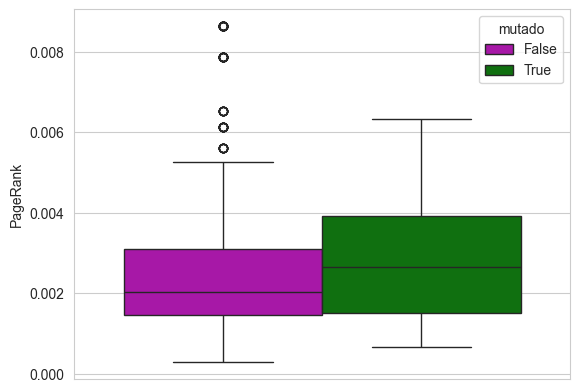

In [28]:

sns_plot = sns.boxplot(y="PageRank",
            hue="mutado", palette=["m", "g"],
            data=dft)


sns_plot.figure.savefig("pageRankMutados_p10.png")

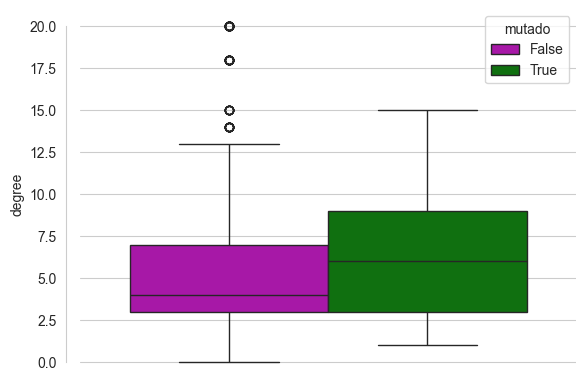

In [31]:
sns.boxplot(y="degree",
            hue="mutado", palette=["m", "g"],
            data=dft)
sns.despine(offset=10, trim=True)

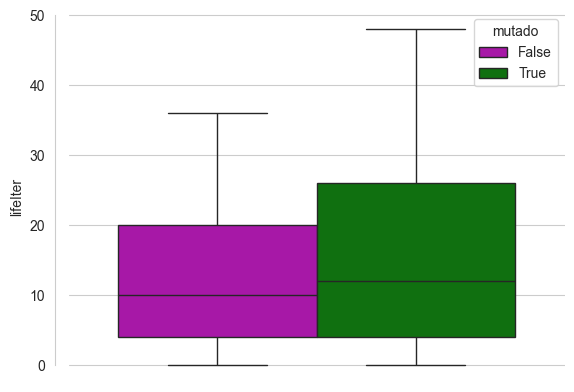

In [32]:
sns.boxplot(y="lifeIter",
            hue="mutado", palette=["m", "g"],
            data=dft)

sns.despine(offset=10, trim=True)

In [33]:
val, frec = np.unique(dft.mutado,return_counts=True)
print(val,frec)

[False  True] [1747 1253]


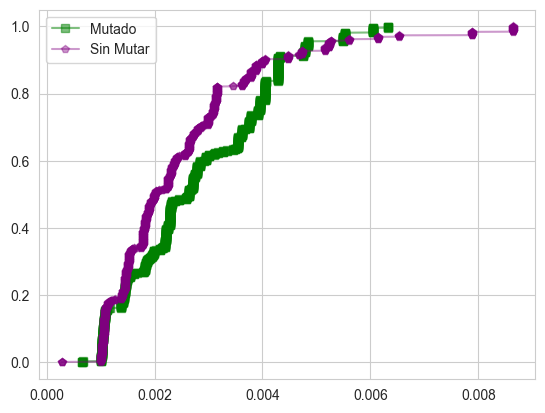

In [37]:
def get_cdf(data):
    N = len(data)
    x = np.sort(data)
    y = np.arange(N)/float(N)
    return x,y

x,y = get_cdf(dft["PageRank"].values)
xm,ym = get_cdf(dft[dft["mutado"]==True]["PageRank"])
xnm,ynm = get_cdf(dft[dft["mutado"]==False]["PageRank"])
# plt.plot(x, y, marker='o',markersize=10) 
plt.plot(xm, ym, marker='s',alpha=0.5,color="green",label="Mutado") 
plt.plot(xnm, ynm, marker='p',alpha=0.4,color="purple",label="Sin Mutar") 
plt.legend()

In [456]:

dr = dft.groupby(["n_gen","mutate_y","mutate_rate"]).agg({"PageRank":np.mean}).reset_index()
dr

,n_gen,mutate_y,mutate_rate,pageRank
0,1,False,-,0.000134
1,2,False,-,0.000237
2,2,True,M1,0.000214
3,2,True,M2,0.000264
4,3,False,-,0.000186
...,...,...,...,...
495,198,True,M2,0.000106
496,199,False,-,0.000148
497,199,True,M1,0.000156
498,200,False,-,0.000109


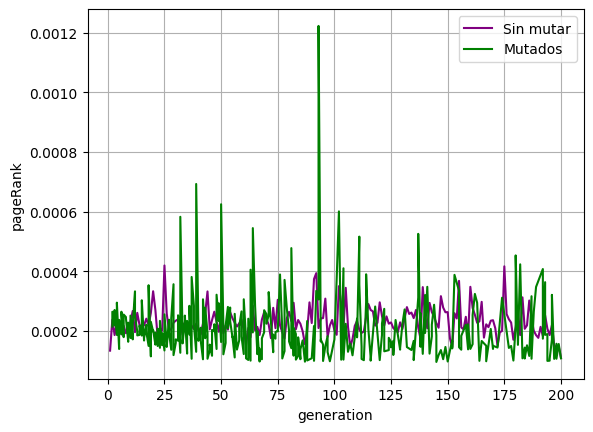

In [457]:
tm = dr[dr["mutate_y"]==True].index
tf = dr[dr["mutate_y"]==False].index
ti = dr["mutate_y"]
fig, ax = plt.subplots()

ax.plot(dr.n_gen[~ti],dr.pageRank[~ti],color="purple",label="Sin mutar")
ax.plot(dr.n_gen[ti],dr.pageRank[ti],color="green",label="Mutados")
ax.set(xlabel='generation', ylabel='PageRank',
       # title='About as simple as it gets, folks'
       )
ax.grid()
plt.legend()

# fig.savefig("test.png",dpi=300)
fig.savefig("comparativeAll_g200_p100.png",dpi=300)
plt.show()

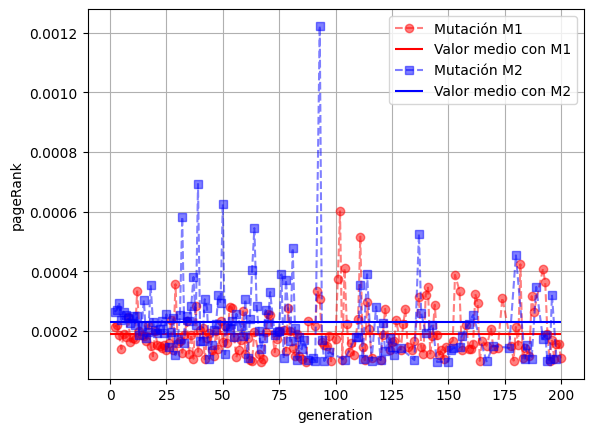

In [458]:
tm = dr[dr["mutate_rate"]=="M1"].index
tf = dr[dr["mutate_rate"]=="M2"].index

fig, ax = plt.subplots()

# ax.scatter(dr.n_gen[tm],dr.pageRank[tm],color="red",label="Mutación M1")
ax.plot(dr.n_gen[tm],dr.pageRank[tm],color="red",label="Mutación M1",linestyle='--', marker='o',alpha=0.5)
ax.hlines(dr.pageRank[tm].mean(),0,GENS,color="red",label="Valor medio con M1")
# ax.scatter(dr.n_gen[tf],dr.pageRank[tf],color="blue",label="Mutación M2")
ax.plot(dr.n_gen[tf],dr.pageRank[tf],color="blue",label="Mutación M2",linestyle='--', marker='s',alpha=.5)
ax.hlines(dr.pageRank[tf].mean(),0,GENS,color="blue",label="Valor medio con M2")
ax.set(xlabel='generation', ylabel='PageRank',
       # title='About as simple as it gets, folks'
       )
ax.grid()
plt.legend()

fig.savefig("comparativeMutationsg200p100.png",dpi=300)
plt.show()

In [426]:
used_columns = ["lifeIter","n_gen","PageRank","pf","iter"]
dfc = dft.loc[:, used_columns]
corr_mat = dfc.corr().stack().reset_index(name="correlation")

In [427]:
corr_mat

,level_0,level_1,correlation
0,lifeIter,lifeIter,1.000000
1,lifeIter,n_gen,0.501311
2,lifeIter,pageRank,0.556079
3,lifeIter,pf,0.023286
4,lifeIter,iter,0.571818
5,n_gen,lifeIter,0.501311
6,n_gen,n_gen,1.000000
7,n_gen,pageRank,0.096355
8,n_gen,pf,0.103597
9,n_gen,iter,0.992313


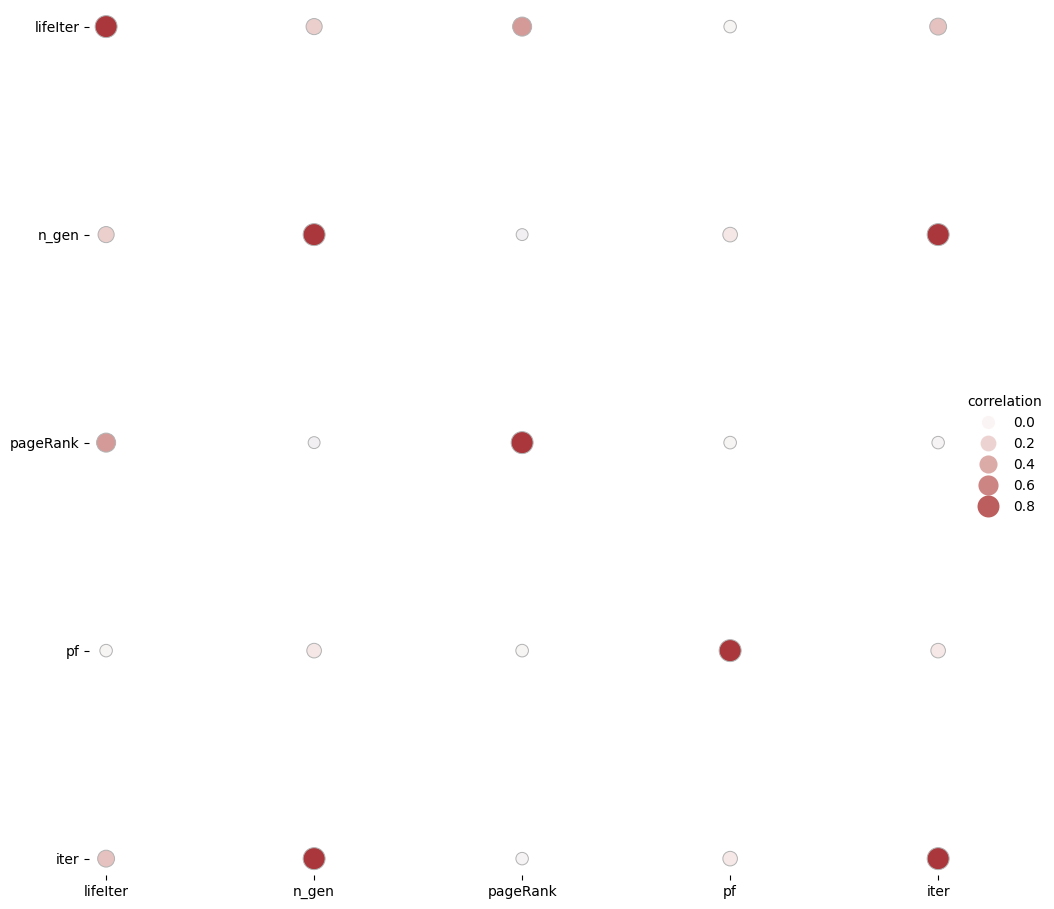

In [390]:
# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)

# Convergencia

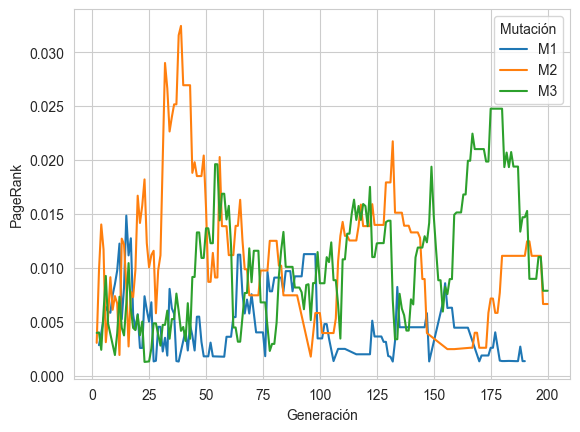

In [162]:
df = pd.read_csv("../examples/fpp/test_200g_10p_Pall.csv")
df.drop(df[df.iter==GENS].index,inplace=True) 
df.loc[df.iter==GENS+1,"iter"]=GENS
df.mutate.fillna(False,inplace=True)
df.loc[df.mutate=="true","mutate"]=True
df.loc[df.mutate=="false","mutate"]=False
df[["parent1","parent2"]]=df["parent"].apply(clean_parents)
edgesp1 = zip(df["parent1"],df["idx"])
edgesp2 = zip(df["parent2"],df["idx"])
G = nx.Graph()
G.add_edges_from(edgesp1)
G.add_edges_from(edgesp2)
G.remove_node("0")
ranks_pr = nx.pagerank(G)
df['PageRank']=df.idx.map(ranks_pr)

# tm1= df[df["mutate_rate"]=="M1"].index
# tm2= df[df["mutate_rate"]=="M2"].index
# tm3 = df[df["mutate_rate"]=="M3"].index
dfd = df.groupby(["mutate_rate","iter"]).aggregate({"PageRank":np.sum})
dfd.reset_index(inplace=True)
dfd.rename(columns={"mutate_rate":"Mutación","iter":"Generación"},inplace=True)
sns_plot = sns.lineplot(data=dfd, x="Generación", y="PageRank", hue="Mutación")

sns_plot.figure.savefig("distribucionPageRank.png")

In [116]:
df = pd.read_csv("../examples/fpp/test_200g_10p_M1.csv")
df.drop(df[df.iter==GENS].index,inplace=True) 
df.loc[df.iter==GENS+1,"iter"]=GENS
df.mutate.fillna(False,inplace=True)
df.loc[df.mutate=="true","mutate"]=True
df.loc[df.mutate=="false","mutate"]=False
df[["parent1","parent2"]]=df["parent"].apply(clean_parents)
edgesp1 = zip(df["parent1"],df["idx"])
edgesp2 = zip(df["parent2"],df["idx"])
G = nx.Graph()
G.add_edges_from(edgesp1)
G.add_edges_from(edgesp2)
G.remove_node("0")
ranks_pr = nx.pagerank(G)
df['PageRank']=df.idx.map(ranks_pr)

mean_pr = df[df["mutate"]==True].PageRank.mean()
print(mean_pr)
perc_pr = np.percentile(df[df["mutate"]==True].PageRank,80)
print(perc_pr)




dc = df[df["PageRank"]>=perc_pr].groupby(["iter"]).aggregate({"mutate":np.sum})
gener = dc.index.values
valuesg = dc.mutate.values
valuesg




0.0019250458223844624
0.0029381524404937034


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 2,
       3, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 2, 2, 2, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [117]:
idG = np.repeat(range(GENS//5),5)
dt = pd.DataFrame({"t":idG,"v":valuesg})
dx = dt.groupby("t").agg({"v":np.sum})
dx.index = dx.index *5
dx

ValueError: All arrays must be of the same length

In [118]:
import pickle as pkl

CASE = 500
devices = CASE-1
jobs = 9
# df2 = pd.read_pickle('logs/log_ga_pf_convergence'  + str("500v9") + "_" + str(jobs) + '_' + str(devices)+'_0.pkl', 'infer')
# df2 = pd.read_pickle('../logs/log_ga_pf_convergence500v9_9_499_0.pkl', 'infer')
df2 = pd.read_pickle('../logs/log_ga_pf_P10_convergence500v9_9_499_0.pkl', 'infer')
df2 = pd.DataFrame(df2)
df2[['f1','f2']] = pd.DataFrame(df2[0].tolist(), index= df2.index)


In [123]:
df2Ma = pd.read_pickle('../logs/log_ga_pf_P10_Mall_convergence500v9_9_499_0.pkl', 'infer')
df2Ma = pd.DataFrame(df2Ma)
df2Ma[['f1','f2']] = pd.DataFrame(df2Ma[0].tolist(), index= df2Ma.index)

In [43]:
df2M1 = pd.read_pickle('../logs/log_ga_pf_P10_M1_convergence500v9_9_499_0.pkl', 'infer')
df2M1 = pd.DataFrame(df2M1)
df2M1[['f1','f2']] = pd.DataFrame(df2M1[0].tolist(), index= df2M1.index)

In [46]:
df2M2 = pd.read_pickle('../logs/log_ga_pf_P10_M2_convergence500v9_9_499_0.pkl', 'infer')
df2M2 = pd.DataFrame(df2M2)
df2M2[['f1','f2']] = pd.DataFrame(df2M2[0].tolist(), index=df2M2.index)

In [120]:
df2M3 = pd.read_pickle('../logs/log_ga_pf_P10_M3_convergence500v9_9_499_0.pkl', 'infer')
df2M3 = pd.DataFrame(df2M3)
df2M3[['f1','f2']] = pd.DataFrame(df2M3[0].tolist(), index=df2M3.index)

In [53]:
df2Mn = pd.read_pickle('../logs/log_ga_pf_P10_None_convergence500v9_9_499_0.pkl', 'infer')
df2Mn = pd.DataFrame(df2Mn)
df2Mn[['f1','f2']] = pd.DataFrame(df2Mn[0].tolist(), index=df2Mn.index)

In [130]:
df2M1M3 = pd.read_pickle('../logs/log_ga_pf_P10_M1M3_convergence500v9_9_499_0.pkl', 'infer')
df2M1M3 = pd.DataFrame(df2M1M3)
df2M1M3[['f1','f2']] = pd.DataFrame(df2M1M3[0].tolist(), index=df2M1M3.index)

In [133]:
df2pM1M2 = pd.read_pickle('../logs/log_ga_pf_P10_PM1M2_convergence500v9_9_499_0.pkl', 'infer')
df2pM1M2 = pd.DataFrame(df2pM1M2)
df2pM1M2[['f1','f2']] = pd.DataFrame(df2pM1M2[0].tolist(), index=df2pM1M2.index)

In [136]:
df2pM1M2M3 = pd.read_pickle('../logs/log_ga_pf_P10_PM1M2M3_convergence500v9_9_499_0.pkl', 'infer')
df2pM1M2M3 = pd.DataFrame(df2pM1M2M3)
df2pM1M2M3[['f1','f2']] = pd.DataFrame(df2pM1M2M3[0].tolist(), index=df2pM1M2M3.index)

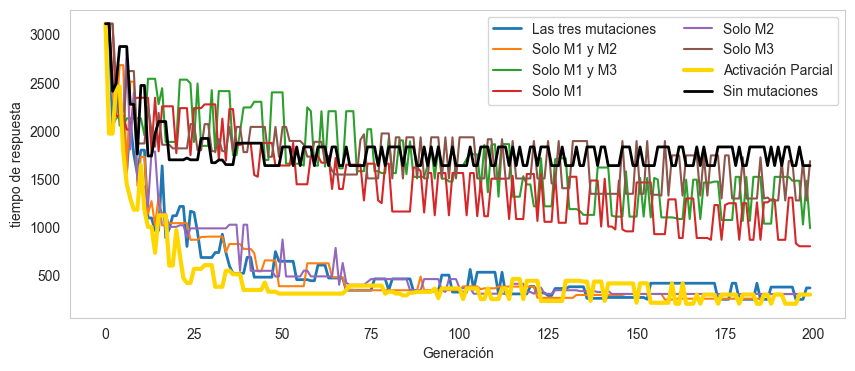

In [163]:
fig, ax = plt.subplots(figsize=(10,4))
df2Ma[['f1']].plot(ax=ax,label="Las tres mutaciones",linewidth=2.0)
df2[['f1']].plot(ax=ax,label="Solo M1 y M2")
df2M1M3[['f1']].plot(ax=ax,label="Solo M1 y M3")
df2M1[['f1']].plot(ax=ax,label="Solo M1")
df2M2[['f1']].plot(ax=ax,label="Solo M2")
df2M3[['f1']].plot(ax=ax,label="Solo M3")
# df2pM1M2[['f1']].plot(ax=ax,label="Parcialmente M1 y M2",color="olive",linewidth=2.0)
df2pM1M2M3[['f1']].plot(ax=ax,label="Parcialmente las tres",color="gold",linewidth=3.0)
df2Mn[['f1']].plot(ax=ax,label="Sin mutaciones",color="black", legend=True,linewidth=2.0) #,linestyle="-."
ax.set(xlabel='Generación', ylabel='tiempo de respuesta',
       # title='About as simple as it gets, folks'
       )
ax.grid()

# ax2 = ax.twinx() 
# ax2.scatter(dx.index,dx.v)

ax.legend(["Las tres mutaciones","Solo M1 y M2","Solo M1 y M3","Solo M1","Solo M2","Solo M3","Activación Parcial","Sin mutaciones"],ncol=2)
# ax.legend(["Las tres mutaciones","Solo M1 y M2","Solo M1 y M3","Solo M1","Solo M2","Solo M3","Parcialmente M1 y M2","Parcialmente Todas","Sin mutaciones"],ncol=2)
fig.savefig("convergencep10g200.png",dpi=300)
plt.show()